In [ ]:
!git clone https://github.com/PoojaPremnath2003/ImageSuperResolution_Urban100


fatal: destination path 'ImageSuperResolution_Urban100' already exists and is not an empty directory.


In [ ]:
path_low="/content/ImageSuperResolution_Urban100/Low Resolution"
path_high="/content/ImageSuperResolution_Urban100/High Resolution"

In [ ]:
import os
import re
import torch
from torch.utils.data import Dataset
from skimage import io, transform

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, path_low, path_high, file_list):
        self.lr_path = path_low
        self.hr_path = path_high
        self.file_list = file_list
        self.target_size = (256, 256)  # Adjust this size as needed


    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name_lr = os.path.join(self.lr_path, self.file_list[idx])
        img_name_hr = os.path.join(self.hr_path, re.sub(r'LR', 'HR', self.file_list[idx]))

        # Load LR and HR images
        image_lr = io.imread(img_name_lr, as_gray=True)
        image_hr = io.imread(img_name_hr, as_gray=True)

        # Resize images to a common size
        image_lr = transform.resize(image_lr, self.target_size, mode='constant', anti_aliasing=True)
        image_hr = transform.resize(image_hr, self.target_size, mode='constant', anti_aliasing=True)

        # Convert to PyTorch tensors
        image_lr = torch.from_numpy(image_lr).unsqueeze(0).float()
        image_hr = torch.from_numpy(image_hr).unsqueeze(0).float()

        return image_lr, image_hr


In [ ]:
file_list = [f for f in os.listdir(path_low) if f.endswith("LR.png")]

# Perform train-test split
train_files, test_files = train_test_split(file_list, test_size=0.2, random_state=42)

# Create datasets and data loaders for train and test sets
train_dataset = CustomDataset(path_low, path_high, train_files)
test_dataset = CustomDataset(path_low, path_high, test_files)

In [ ]:
print(file_list)

['img_007_SRF_4_LR.png', 'img_045_SRF_2_LR.png', 'img_090_SRF_4_LR.png', 'img_039_SRF_2_LR.png', 'img_059_SRF_2_LR.png', 'img_060_SRF_2_LR.png', 'img_077_SRF_4_LR.png', 'img_031_SRF_4_LR.png', 'img_092_SRF_4_LR.png', 'img_039_SRF_4_LR.png', 'img_088_SRF_4_LR.png', 'img_002_SRF_4_LR.png', 'img_085_SRF_4_LR.png', 'img_058_SRF_4_LR.png', 'img_027_SRF_2_LR.png', 'img_013_SRF_2_LR.png', 'img_083_SRF_2_LR.png', 'img_066_SRF_4_LR.png', 'img_033_SRF_2_LR.png', 'img_048_SRF_2_LR.png', 'img_100_SRF_2_LR.png', 'img_084_SRF_2_LR.png', 'img_040_SRF_2_LR.png', 'img_007_SRF_2_LR.png', 'img_016_SRF_2_LR.png', 'img_047_SRF_4_LR.png', 'img_034_SRF_4_LR.png', 'img_068_SRF_4_LR.png', 'img_004_SRF_2_LR.png', 'img_056_SRF_4_LR.png', 'img_095_SRF_2_LR.png', 'img_070_SRF_2_LR.png', 'img_069_SRF_2_LR.png', 'img_065_SRF_2_LR.png', 'img_064_SRF_2_LR.png', 'img_041_SRF_2_LR.png', 'img_023_SRF_4_LR.png', 'img_078_SRF_4_LR.png', 'img_005_SRF_4_LR.png', 'img_010_SRF_4_LR.png', 'img_086_SRF_2_LR.png', 'img_062_SRF_2_

In [ ]:
print(train_dataset.file_list)

['img_019_SRF_4_LR.png', 'img_081_SRF_4_LR.png', 'img_005_SRF_4_LR.png', 'img_016_SRF_2_LR.png', 'img_020_SRF_2_LR.png', 'img_075_SRF_2_LR.png', 'img_056_SRF_4_LR.png', 'img_048_SRF_2_LR.png', 'img_054_SRF_4_LR.png', 'img_096_SRF_4_LR.png', 'img_018_SRF_2_LR.png', 'img_021_SRF_4_LR.png', 'img_060_SRF_2_LR.png', 'img_073_SRF_4_LR.png', 'img_006_SRF_2_LR.png', 'img_089_SRF_4_LR.png', 'img_082_SRF_2_LR.png', 'img_009_SRF_2_LR.png', 'img_066_SRF_2_LR.png', 'img_052_SRF_4_LR.png', 'img_028_SRF_2_LR.png', 'img_057_SRF_2_LR.png', 'img_070_SRF_2_LR.png', 'img_085_SRF_4_LR.png', 'img_041_SRF_2_LR.png', 'img_008_SRF_2_LR.png', 'img_015_SRF_2_LR.png', 'img_065_SRF_4_LR.png', 'img_011_SRF_2_LR.png', 'img_011_SRF_4_LR.png', 'img_097_SRF_2_LR.png', 'img_012_SRF_2_LR.png', 'img_098_SRF_4_LR.png', 'img_062_SRF_2_LR.png', 'img_044_SRF_2_LR.png', 'img_004_SRF_4_LR.png', 'img_034_SRF_4_LR.png', 'img_043_SRF_2_LR.png', 'img_030_SRF_2_LR.png', 'img_080_SRF_2_LR.png', 'img_090_SRF_4_LR.png', 'img_077_SRF_2_

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the SRCNN model
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=9, padding=4)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=0)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(32, 1, kernel_size=5, padding=2)

    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.relu2(self.conv2(x))
        x = self.conv3(x)
        return x

# Create an instance of the SRCNN model
srcnn_model = SRCNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(srcnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    srcnn_model.train()
    running_loss = 0.0

    for inputs_lr, targets_hr in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs_hr = srcnn_model(inputs_lr)

        # Calculate the loss
        loss = criterion(outputs_hr, targets_hr)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print the average loss for the epoch
    average_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {average_loss}')

Epoch 1/10, Training Loss: 0.06084906561300159
Epoch 2/10, Training Loss: 0.016358342627063392
Epoch 3/10, Training Loss: 0.00891274909954518
Epoch 4/10, Training Loss: 0.005460964259691536
Epoch 5/10, Training Loss: 0.00398742004763335
Epoch 6/10, Training Loss: 0.0031770137138664722
Epoch 7/10, Training Loss: 0.0026992270664777606
Epoch 8/10, Training Loss: 0.0023969508591108026
Epoch 9/10, Training Loss: 0.0026679141621571032
Epoch 10/10, Training Loss: 0.002442230109591037


In [ ]:
from torchsummary import summary


input_height, input_width = 256, 256

# Move the model to the device (e.g., GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
srcnn_model.to(device)

# Print the model summary
summary(srcnn_model, (1, input_height, input_width))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           5,248
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 32, 256, 256]           2,080
              ReLU-4         [-1, 32, 256, 256]               0
            Conv2d-5          [-1, 1, 256, 256]             801
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.25
Forward/backward pass size (MB): 96.50
Params size (MB): 0.03
Estimated Total Size (MB): 96.78
----------------------------------------------------------------


In [ ]:
pip install torchviz graphviz


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4133 sha256=a27bbe608c40e29de490dededda87856295746271e4c8f628c96efa374a15844
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
from torchviz import make_dot

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
srcnn_model.to(device)

# Create a dummy input tensor for visualization
dummy_input = torch.randn(1, 1, input_height, input_width).to(device)

# Visualize the model
dot = make_dot(srcnn_model(dummy_input), params=dict(srcnn_model.named_parameters()))
dot.render("srcnn_model", format="png", cleanup=True)


'srcnn_model.png'

In [ ]:
# Testing loop
srcnn_model.eval()
test_loss = 0.0

with torch.no_grad():
    for inputs_lr, targets_hr in test_loader:
        outputs_hr = srcnn_model(inputs_lr)
        test_loss += criterion(outputs_hr, targets_hr).item()

average_test_loss = test_loss / len(test_loader)
print(f'Average Test Loss: {average_test_loss}')


Average Test Loss: 0.0018490113317966462


In [ ]:
# Save the model parameters and weights
torch.save(srcnn_model.state_dict(), 'srcnn_model.pth')



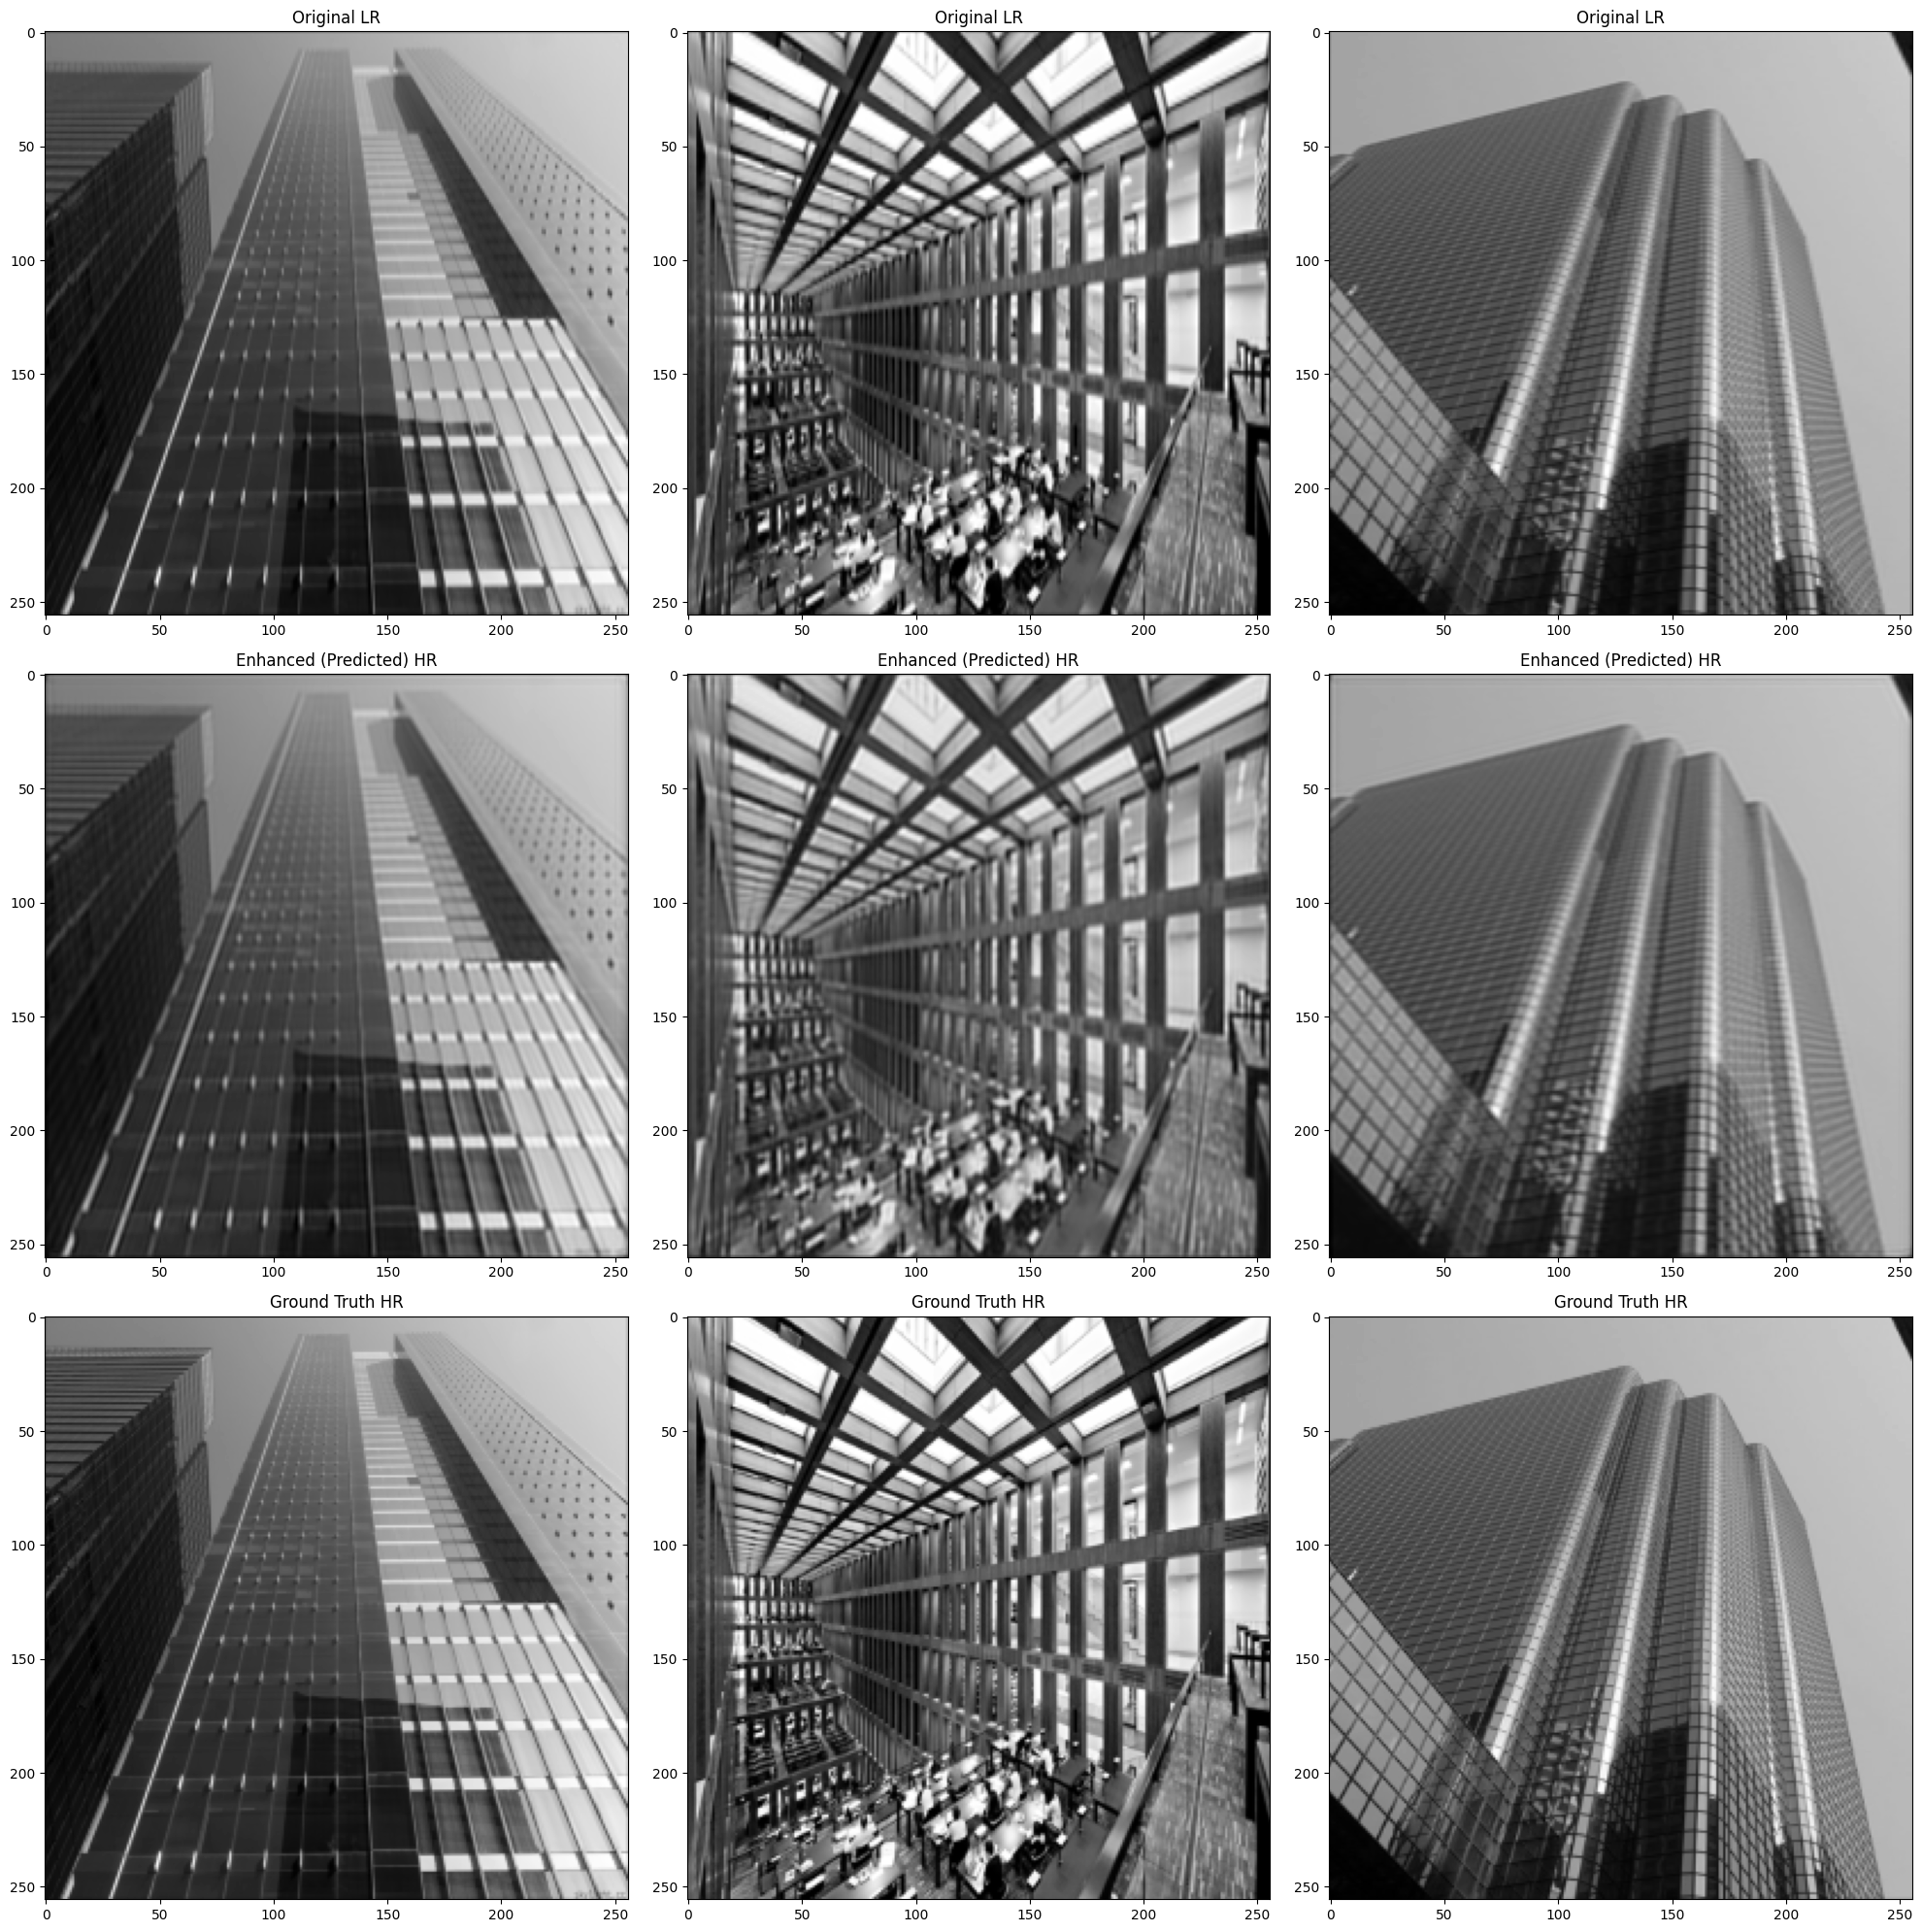

In [ ]:
import matplotlib.pyplot as plt


srcnn_model.eval()

# Visualize a few samples
num_samples_to_visualize = 3
plt.figure(figsize=(20,20))

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    if i == num_samples_to_visualize:
        break

    # Select the first image from the batch
    input_lr = inputs_lr[0]
    target_hr = targets_hr[0]

    # Forward pass to get the enhanced image
    output_hr = srcnn_model(input_lr.unsqueeze(0))

    # Convert PyTorch tensors to NumPy arrays for visualization
    input_lr_np = input_lr.squeeze().numpy()
    output_hr_np = output_hr.squeeze().detach().numpy()
    target_hr_np = target_hr.squeeze().numpy()

    # Plot the original low-resolution image
    plt.subplot(3, num_samples_to_visualize, i + 1)
    plt.imshow(input_lr_np,cmap='gray')
    plt.title('Original LR')

    # Plot the enhanced image
    plt.subplot(3, num_samples_to_visualize, i + 1 + num_samples_to_visualize)
    plt.imshow(output_hr_np,cmap='gray')
    plt.title('Enhanced (Predicted) HR')

    # Plot the ground truth high-resolution image
    plt.subplot(3, num_samples_to_visualize, i + 1 + 2 * num_samples_to_visualize)
    plt.imshow(target_hr_np,cmap='gray')
    plt.title('Ground Truth HR')

plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('image_grid.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
import torch
import math

def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse.item()))
    return psnr


srcnn_model.eval()

# Calculate PSNR for all test images
psnr_values = []

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    # Forward pass to get the enhanced image
    outputs_hr = srcnn_model(inputs_lr)

    # Calculate PSNR for each image in the batch
    for j in range(outputs_hr.size(0)):
        psnr_value = psnr(outputs_hr[j].squeeze(), targets_hr[j])
        psnr_values.append(psnr_value)

        print(f'Sample {i * test_loader.batch_size + j + 1}, PSNR: {psnr_value:.2f}')

# Calculate average PSNR
average_psnr = sum(psnr_values) / len(psnr_values)
print(f'Average PSNR: {average_psnr:.2f}')


Sample 1, PSNR: 30.19
Sample 2, PSNR: 28.83
Sample 3, PSNR: 25.36
Sample 4, PSNR: 30.97
Sample 5, PSNR: 25.84
Sample 6, PSNR: 28.99
Sample 7, PSNR: 33.18
Sample 8, PSNR: 27.82
Sample 9, PSNR: 24.86
Sample 10, PSNR: 24.19
Sample 11, PSNR: 27.88
Sample 12, PSNR: 28.24
Sample 13, PSNR: 30.23
Sample 14, PSNR: 30.58
Sample 15, PSNR: 25.97
Sample 16, PSNR: 28.20
Sample 17, PSNR: 27.44
Sample 18, PSNR: 25.57
Sample 19, PSNR: 26.16
Sample 20, PSNR: 32.18
Sample 21, PSNR: 30.74
Sample 22, PSNR: 25.83
Sample 23, PSNR: 30.14
Sample 24, PSNR: 29.85
Sample 25, PSNR: 29.43
Sample 26, PSNR: 28.27
Sample 27, PSNR: 25.18
Sample 28, PSNR: 30.22
Sample 29, PSNR: 21.52
Sample 30, PSNR: 30.29
Sample 31, PSNR: 26.75
Sample 32, PSNR: 29.55
Sample 33, PSNR: 31.93
Sample 34, PSNR: 27.42
Sample 35, PSNR: 31.53
Sample 36, PSNR: 25.91
Sample 37, PSNR: 26.68
Sample 38, PSNR: 28.42
Sample 39, PSNR: 23.40
Sample 40, PSNR: 29.38
Average PSNR: 28.13


In [ ]:
from skimage.metrics import structural_similarity as compare_ssim


# Set the model to evaluation mode
srcnn_model.eval()

# Calculate SSIM for all test images
ssim_values = []

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    # Forward pass to get the enhanced image
    outputs_hr = srcnn_model(inputs_lr)

    # Calculate SSIM for each image in the batch
    for j in range(outputs_hr.size(0)):
        # Convert tensors to numpy arrays
        output_hr_np = outputs_hr[j].squeeze().detach().numpy()
        target_hr_np = targets_hr[j].squeeze().numpy()

        # Normalize images to the range [0, 255] if needed
        output_hr_np = (output_hr_np * 255).astype(np.uint8)
        target_hr_np = (target_hr_np * 255).astype(np.uint8)

        # Calculate SSIM
        ssim_value, _ = compare_ssim(output_hr_np, target_hr_np, full=True)
        ssim_values.append(ssim_value)

        print(f'Sample {i * test_loader.batch_size + j + 1}, SSIM: {ssim_value:.4f}')

# Calculate average SSIM
average_ssim = sum(ssim_values) / len(ssim_values)
print(f'Average SSIM: {average_ssim:.4f}')


Sample 1, SSIM: 0.8968
Sample 2, SSIM: 0.9414
Sample 3, SSIM: 0.7630
Sample 4, SSIM: 0.9149
Sample 5, SSIM: 0.8609
Sample 6, SSIM: 0.8586
Sample 7, SSIM: 0.9039
Sample 8, SSIM: 0.9188
Sample 9, SSIM: 0.8132
Sample 10, SSIM: 0.8211
Sample 11, SSIM: 0.7258
Sample 12, SSIM: 0.8733
Sample 13, SSIM: 0.8881
Sample 14, SSIM: 0.8913
Sample 15, SSIM: 0.8870
Sample 16, SSIM: 0.9172
Sample 17, SSIM: 0.8492
Sample 18, SSIM: 0.7671
Sample 19, SSIM: 0.8751
Sample 20, SSIM: 0.9497
Sample 21, SSIM: 0.8715
Sample 22, SSIM: 0.8445
Sample 23, SSIM: 0.8159
Sample 24, SSIM: 0.8155
Sample 25, SSIM: 0.9452
Sample 26, SSIM: 0.8732
Sample 27, SSIM: 0.8159
Sample 28, SSIM: 0.9524
Sample 29, SSIM: 0.8979
Sample 30, SSIM: 0.9130
Sample 31, SSIM: 0.8870
Sample 32, SSIM: 0.8896
Sample 33, SSIM: 0.9480
Sample 34, SSIM: 0.9098
Sample 35, SSIM: 0.9461
Sample 36, SSIM: 0.7328
Sample 37, SSIM: 0.8811
Sample 38, SSIM: 0.8765
Sample 39, SSIM: 0.8493
Sample 40, SSIM: 0.8633
Average SSIM: 0.8711


In [ ]:
pip install image-similarity-measures[speedup]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 72.3 MB/s eta 0:00:00
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26961 sha256=4082a8a16bfed2ac7ae6d7e2dd8bb0576547f22754cfb88c6355501e8e995f25
  Stored in directory: /root/.cache/pip/wheels/05/37/63/26a896aa2113f7eac15120c277787dcdad4a9b70cace22251f
Successfully built phasepack
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
li

In [ ]:
import torch
import math

def rmse(img1, img2):
    mse = torch.mean((img1 - img2) ** 2)
    rmse_value = math.sqrt(mse.item())
    return rmse_value

srcnn_model.eval()

# Calculate RMSE for all test images
rmse_values = []

for i, (inputs_lr, targets_hr) in enumerate(test_loader):
    # Forward pass to get the enhanced image
    outputs_hr = srcnn_model(inputs_lr)

    # Calculate RMSE for each image in the batch
    for j in range(outputs_hr.size(0)):
        rmse_value = rmse(outputs_hr[j].squeeze(), targets_hr[j])
        rmse_values.append(rmse_value)

        print(f'Sample {i * test_loader.batch_size + j + 1}, RMSE: {rmse_value:.2f}')

# Calculate average RMSE
average_rmse = sum(rmse_values) / len(rmse_values)
print(f'Average RMSE: {average_rmse:.2f}')


Sample 1, RMSE: 0.03
Sample 2, RMSE: 0.04
Sample 3, RMSE: 0.05
Sample 4, RMSE: 0.03
Sample 5, RMSE: 0.05
Sample 6, RMSE: 0.04
Sample 7, RMSE: 0.02
Sample 8, RMSE: 0.04
Sample 9, RMSE: 0.06
Sample 10, RMSE: 0.06
Sample 11, RMSE: 0.04
Sample 12, RMSE: 0.04
Sample 13, RMSE: 0.03
Sample 14, RMSE: 0.03
Sample 15, RMSE: 0.05
Sample 16, RMSE: 0.04
Sample 17, RMSE: 0.04
Sample 18, RMSE: 0.05
Sample 19, RMSE: 0.05
Sample 20, RMSE: 0.02
Sample 21, RMSE: 0.03
Sample 22, RMSE: 0.05
Sample 23, RMSE: 0.03
Sample 24, RMSE: 0.03
Sample 25, RMSE: 0.03
Sample 26, RMSE: 0.04
Sample 27, RMSE: 0.06
Sample 28, RMSE: 0.03
Sample 29, RMSE: 0.08
Sample 30, RMSE: 0.03
Sample 31, RMSE: 0.05
Sample 32, RMSE: 0.03
Sample 33, RMSE: 0.03
Sample 34, RMSE: 0.04
Sample 35, RMSE: 0.03
Sample 36, RMSE: 0.05
Sample 37, RMSE: 0.05
Sample 38, RMSE: 0.04
Sample 39, RMSE: 0.07
Sample 40, RMSE: 0.03
Average RMSE: 0.04
